In [3]:
# 'https://www.kaggle.com/cityofLA/los-angeles-parking-citations/downloads/los-angeles-parking-citations.zip/127'

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
file_name = 'parking-citations.csv'
dd = pd.read_csv(file_name, chunksize=10000, index_col=0,
                usecols= ['Ticket number', 'Issue time', 'Meter Id', 'Marked Time',
                          'RP State Plate', 'Make', 'Color',  'Violation code',
                          'Fine amount','Latitude', 'Longitude'],
       
                  dtype = {'Ticket number': object,
                      'Issue time': object,
                    'Meter Id': object,
                    'Marked Time': object,
                    'RP State Plate': 'category',
                    'Make': 'category',
                    'Color': 'category',
                    'Violation code': 'category',
                    'Fine amount': 'category',
                    'Latitude': np.float64, 
                    'Longitude': np.float64})
 

df =  pd.concat(dd)
# df = dd.get_chunk()
df.columns = df.columns.str.replace(' ', '_')

In [2]:
df.head()

,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Make,Color,Violation_code,Fine_amount,Latitude,Longitude
Ticket number,,,,,,,,,,
1103341116,1251,NaN,NaN,CA,HOND,GY,4000A1,50,99999.0,99999.0
1103700150,1435,NaN,NaN,CA,GMC,WH,4000A1,50,99999.0,99999.0
1104803000,2055,NaN,NaN,CA,NISS,BK,8939,58,6439997.9,1802686.4
1104820732,1515,NaN,NaN,CA,ACUR,WH,000,NaN,6440041.1,1802686.2
1105461453,115,NaN,NaN,CA,CHEV,BK,8069A,93,99999.0,99999.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8799051 entries, 1103341116 to 4348572454
Data columns (total 10 columns):
Issue_time        object
Meter_Id          object
Marked_Time       object
RP_State_Plate    object
Make              object
Color             object
Violation_code    object
Fine_amount       object
Latitude          float64
Longitude         float64
dtypes: float64(2), object(8)
memory usage: 738.4+ MB


In [4]:
df.Make.value_counts()[0:20]

TOYT    1457142
HOND     991473
FORD     769656
NISS     628152
CHEV     599863
BMW      401886
MERZ     357998
VOLK     301538
HYUN     270639
DODG     257586
LEXS     250494
KIA      205041
JEEP     203273
AUDI     170639
MAZD     161075
OTHR     146813
GMC      126333
CHRY     115346
INFI     114051
ACUR     106193
Name: Make, dtype: int64

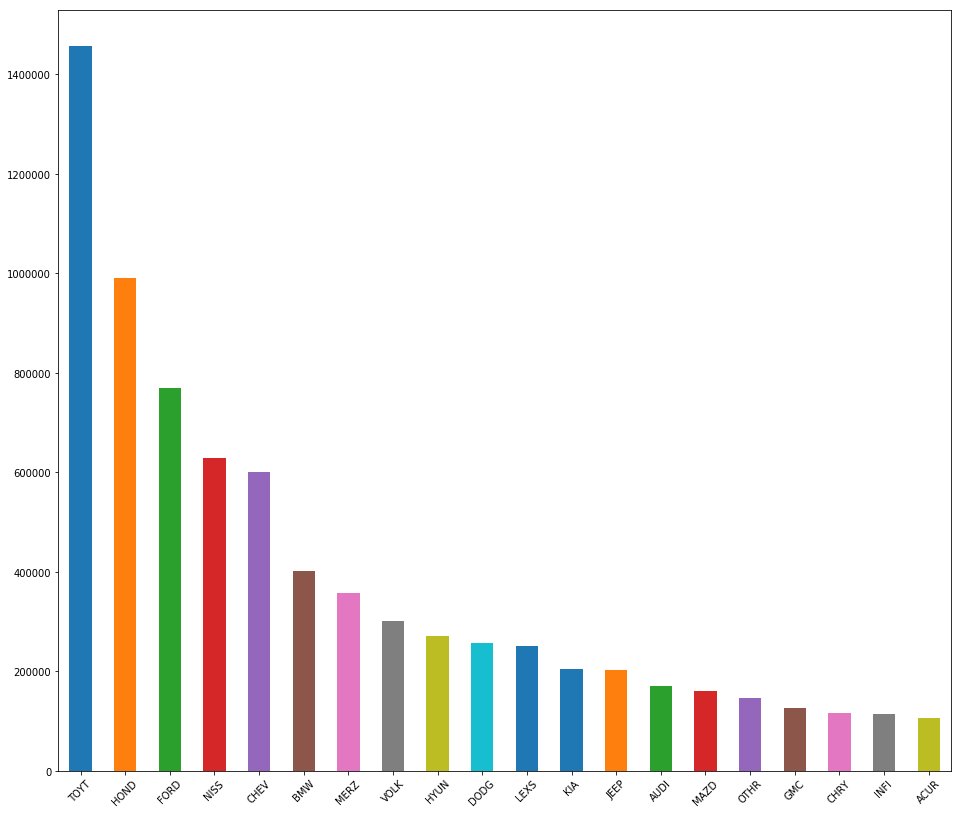

In [7]:
df.Make.value_counts()[0:20].plot(kind='bar', rot=45, figsize=(16, 14))
plt.show()

In [10]:
# !head parking-citations.csv
df.RP_State_Plate.value_counts()[0:20]

CA    8195792
AZ      78277
TX      55839
NV      52373
FL      38263
WA      34874
IL      25178
OR      24497
CO      22360
NY      16394
PA      12910
UT      12552
MI      12350
OH      12080
NJ      11773
GA      11726
TN      11358
IN      11358
VA      10561
MA       9494
Name: RP_State_Plate, dtype: int64

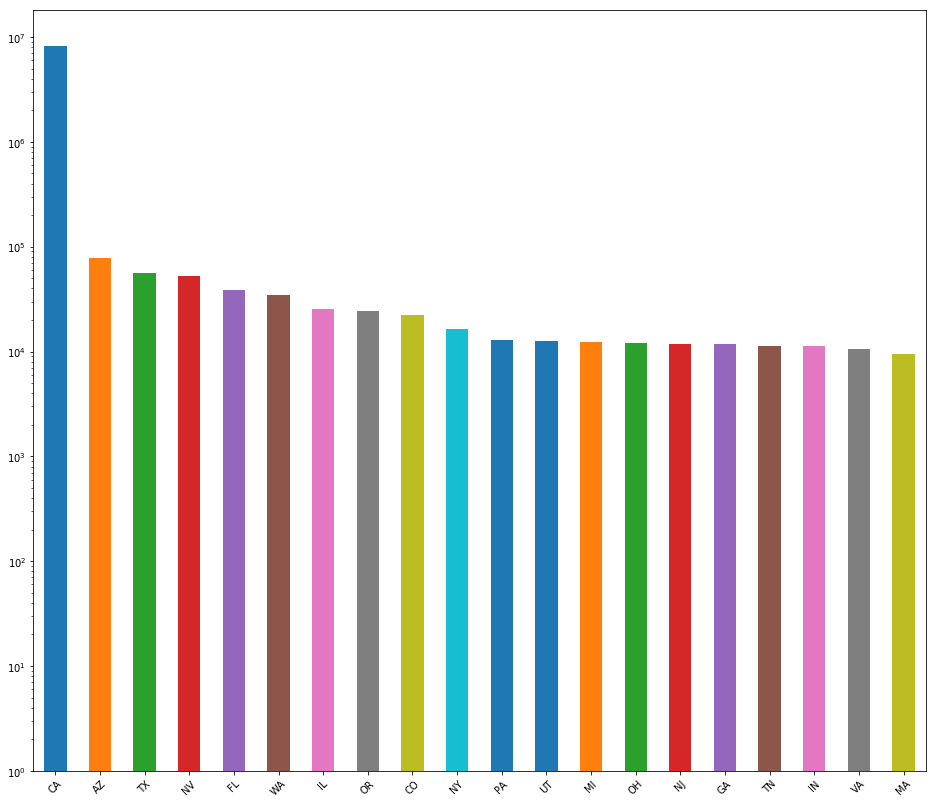

In [12]:
df.RP_State_Plate.value_counts()[0:20].plot(kind='bar', rot=45, log=True, figsize=(16, 14))

In [100]:
df.head()

,Issue_time,Meter_Id,Marked_Time,RP_State_Plate,Make,Color,Violation_code,Fine_amount,Latitude,Longitude
Ticket number,,,,,,,,,,
1103341116,1251,NaN,NaN,CA,HOND,GY,4000A1,50,99999.0,99999.0
1103700150,1435,NaN,NaN,CA,GMC,WH,4000A1,50,99999.0,99999.0
1104803000,2055,NaN,NaN,CA,NISS,BK,8939,58,6439997.9,1802686.4
1104820732,1515,NaN,NaN,CA,ACUR,WH,000,NaN,6440041.1,1802686.2
1105461453,115,NaN,NaN,CA,CHEV,BK,8069A,93,99999.0,99999.0


THIS SECTION SHOULD BE WORKED ON! IT IS SLOW BECUASE OF HAVING LARGE DATA! <BR>
PANDAS IS SLOW FOR THIS LARGE DATABASE OF 9000000 ENTRIES! 

In [ ]:
from plotly import figure_factory as FF 


import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from IPython.display import Image
import plotly
plotly.tools.set_credentials_file(username='###', api_key='##')




In [ ]:

colors=[[0, '#380000'], [0.05, '#500000'],
              [0.15, '#680000'], [0.2, '#800000'],
              [0.25, '#980000'], [0.35, '#A80000'],
              [0.45, '#B80000 '], [0.55, '#C00000'], [1.0, '#FF0000']]

plotmap = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['Fine_amount'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
   
        colorscale = colors,
#         reversescale = False,
        colorbar = dict(
            title = ""),
      ) )]

layout = dict(
    title = "Los angeles park safe zones (based on parking citation index",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'natural earth'
        )
    ),
     height=700,
    width=900
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

<br>**This section is only to show this is the map (bubble map) which I plan to use to show park <br>
safe index for driver in Lons Angles (based on number and amount of parking citationa)** 

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = 'Los angeles park safe zones (based on parking citation index) <br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=cities, layout=layout)
py.iplot(fig, validate=False, filename='d3-bubble-map-populations')